In [1]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setup data
data = {
    'Algorithm': ['Least Conn', 'Least Conn', 'Least Conn', 'Round Robin', 'Round Robin', 'Round Robin'],
    'Run': [1, 2, 3, 1, 2, 3],
    'Latency (ms/request)': [22.176, 26.673, 26.975, 22.893, 24.039, 23.025],
    'Throughput (req/sec)': [2254.74, 1874.53, 1853.57, 2184.04, 2079.93, 2171.56]
}

df = pd.DataFrame(data)
df

,Algorithm,Run,Latency (ms/request),Throughput (req/sec)
0,Least Conn,1,22.176,2254.74
1,Least Conn,2,26.673,1874.53
2,Least Conn,3,26.975,1853.57
3,Round Robin,1,22.893,2184.04
4,Round Robin,2,24.039,2079.93
5,Round Robin,3,23.025,2171.56


In [2]:
# Hitung rata-rata Latency & Throughput
avg_latency = df.groupby('Algorithm')['Latency (ms/request)'].mean()
avg_throughput = df.groupby('Algorithm')['Throughput (req/sec)'].mean()

print("Average Latency:\n", avg_latency)
print("\nAverage Throughput:\n", avg_throughput)

Average Latency:
 Algorithm
Least Conn     25.274667
Round Robin    23.319000
Name: Latency (ms/request), dtype: float64

Average Throughput:
 Algorithm
Least Conn     1994.280000
Round Robin    2145.176667
Name: Throughput (req/sec), dtype: float64


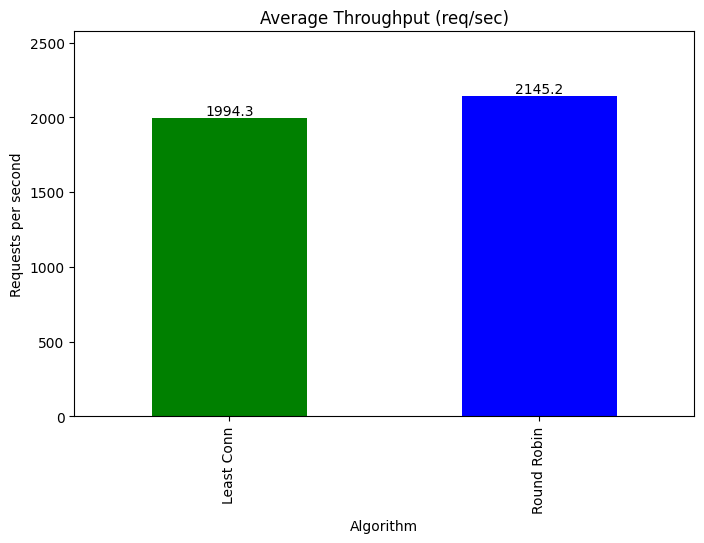

In [3]:
# Plot Throughput
avg_throughput.plot(kind='bar', color=['green', 'blue'], figsize=(8, 5))
plt.title('Average Throughput (req/sec)')
plt.ylabel('Requests per second')
plt.ylim(0, max(avg_throughput) * 1.2)

# Tambah label
for index, value in enumerate(avg_throughput):
    plt.text(index, value + 20, f"{value:.1f}", ha='center')

plt.show()

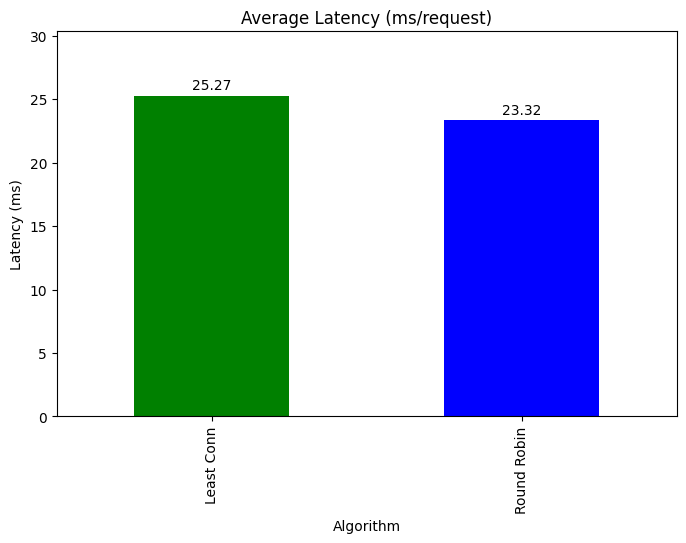

In [4]:
# Plot Latency
avg_latency.plot(kind='bar', color=['green', 'blue'], figsize=(8, 5))
plt.title('Average Latency (ms/request)')
plt.ylabel('Latency (ms)')
plt.ylim(0, max(avg_latency) * 1.2)

# Tambah label
for index, value in enumerate(avg_latency):
    plt.text(index, value + 0.5, f"{value:.2f}", ha='center')

plt.show()

<Figure size 800x500 with 0 Axes>

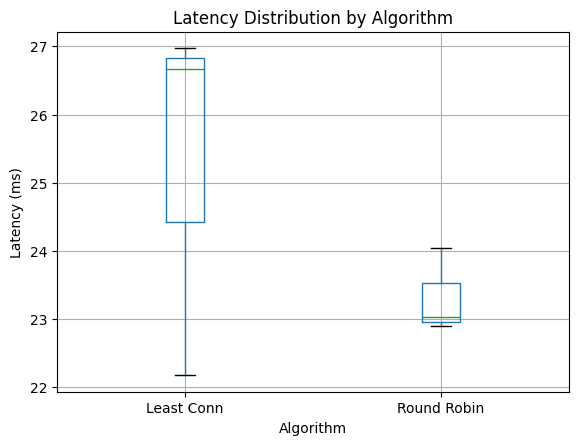

<Figure size 800x500 with 0 Axes>

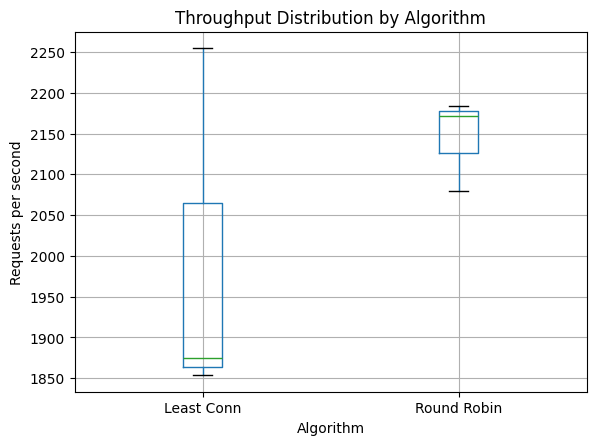

In [5]:
# Boxplot Latency
plt.figure(figsize=(8,5))
df.boxplot(column='Latency (ms/request)', by='Algorithm')
plt.title('Latency Distribution by Algorithm')
plt.suptitle('')
plt.ylabel('Latency (ms)')
plt.show()

# Boxplot Throughput
plt.figure(figsize=(8,5))
df.boxplot(column='Throughput (req/sec)', by='Algorithm')
plt.title('Throughput Distribution by Algorithm')
plt.suptitle('')
plt.ylabel('Requests per second')
plt.show()